# Dynamic Programming Exercises

## Exercise 1


### 1. State variables:

Stock of oil $s_t$ and price $p_t$.

### 2. Control variables:

Amount of oil to sell $x_t$.

### 3. Transition equation:

$s_{t+1} = s_t - x_t$.

### 4. Problem

The sequence problem is:

$\underset{\{x_t\}_{t\in\mathbb N}}{\max}
\left\{\sum_{t\in\mathbb N} 
\left(\frac{1}{1+r}\right)^tp_t x_t \right\}$

subject to: $s_0 = B$, $s_{t+1} = s_t - x_t$ and $x_t \ge 0$ for all $t$.

The Bellman equation is of the form:

$V(s) = \max_x\left\{px + \frac{1}{1+r} V(s - x)\right\}$

or

$V(s) = \max_x\left\{p(s-s') + \frac{1}{1+r} V(s')\right\}$

### 5. The Euler equation

FOC wrt $s'$: 

$p = \frac{1}{1+r}\frac{dV'(s')}{ds'}$,

and

$\frac{dV'(s')}{ds'} = p' - p'\frac{ds''}{ds'} +
\frac{1}{1+r}\frac{dV''(s'')}{ds''}\frac{ds''}{ds'} = p'$.

Therefore the Euler equation is:

$p = p'\frac{1}{1+r}$.

### 6. The solution

Since the utility function is linear, the solution is piecewise.

If $p_{t+1} = p_t$ for all t, then we sell everything today: $x_0 = B$. This follows from the fact that we get the same absolute payoff from selling a marginal unit in any period, but we discount the future.

If $p_{t+1} > (1+r)p_t$, then $x_t = 0$ for all $t$. 
This is actually a violation of the transversality condition, and so the model is not stationary in this case.

A necessary condition for an interior solution is $p_t(1+r) = p_{t+1}$.


## Exercise 2

### 1. State variables:

Amount of capital $k_t$ and shock to production $z_t$.

### 2. Control variables:

Consumption $c_t$.

### 3. Bellman Equation:

$V(z, k) = \max_c\{U(c) + \beta\mathbb EV(z', k')\}$

subject to:

$k' + c = z k^\alpha + (1-\delta)k$.



#### Import some packages

In [6]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import ar1_approx as ar1

# to print plots inline
%matplotlib inline

### Set Parameters

Parameters:
* $\gamma$ : Coefficient of Relative Risk Aversion
* $\beta$ : Discount factor
* $\delta$ : Rate of depreciation
* $\alpha$ : Curvature of production function
* $\sigma_z$ : Standard dev of productivity shocks


In [7]:
gamma = 0.5
beta = 0.96
delta = 0.05
alpha = 0.4
sigma = 0.2
mu    = 0
rho   = 0

### Create Grid Space

In [8]:
'''
------------------------------------------------------------------------
Create Grid for State Space - Capital and Shock
------------------------------------------------------------------------
lb_k      = scalar, lower bound of capital grid
ub_k      = scalar, upper bound of capital grid
size_k    = integer, number of grid points in capital state space
k_grid    = vector, size_k x 1 vector of capital grid points 
------------------------------------------------------------------------
'''
lb_k = 10
ub_k = 13
size_k = 50  # Number of grid points of k
size_z = 50 # Number of grid points of z
k_grid = np.linspace(lb_k, ub_k, size_k)

import ar1_approx as ar1
ln_z_grid, pi = ar1.addacooper(size_z, mu, rho, sigma)
z_grid = np.exp(ln_z_grid)
pi_z = np.transpose(pi)

In [9]:
'''
------------------------------------------------------------------------
Create grid of current utility values    
------------------------------------------------------------------------
C        = matrix, current consumption (c=z_tk_t^a - k_t+1 + (1-delta)k_t)
U        = matrix, current period utility value for all possible
           choices of w and w' (rows are w, columns w')
------------------------------------------------------------------------
'''

C = np.zeros((size_k, size_k, size_z))
for i in range(size_k): # loop over k_t
    for j in range(size_k): # loop over k_t+1
        for q in range(size_z): #loop over z_t
            C[i, j, q] = z_grid[q]* k_grid[i]**alpha + (1 - delta)*k_grid[i] - k_grid[j]

            
# replace 0 and negative consumption with a tiny value 
# This is a way to impose non-negativity on cons
C[C<=0] = 1e-15
if gamma == 1:
    U = np.log(C)
else:
    U = (C ** (1 - gamma)) / (1 - gamma)
U[C<0] = -9999999

### Value function iteration

In [10]:
'''
------------------------------------------------------------------------
Value Function Iteration    
------------------------------------------------------------------------
VFtol     = scalar, tolerance required for value function to converge
VFdist    = scalar, distance between last two value functions
VFmaxiter = integer, maximum number of iterations for value function
V         = vector, the value functions at each iteration
Vmat      = matrix, the value for each possible combination of w and w'
Vstore    = matrix, stores V at each iteration 
VFiter    = integer, current iteration number
TV        = vector, the value function after applying the Bellman operator
PF        = vector, indicies of choices of w' for all w 
VF        = vector, the "true" value function
------------------------------------------------------------------------
'''
VFtol = 1e-6 
VFdist = 7.0 
VFmaxiter = 500 
V = np.zeros((size_k, size_z)) # initial guess at value function
Vmat = np.zeros((size_k, size_k, size_z)) # initialize Vmat matrix
Vstore = np.zeros((size_k, size_z, VFmaxiter)) #initialize Vstore array
VFiter = 1 
while VFdist > VFtol and VFiter < VFmaxiter:
    for i in range(size_k): # loop over k_t
        for j in range(size_k): # loop over k_t+1
            for q in range(size_z): #loop over z_t
                EV = 0
                for qq in range(size_z):
                    EV += pi_z[q, qq]*V[j, qq]
                Vmat[i, j, q] = U[i, j, q] + beta * EV
      
    Vstore[:,:, VFiter] = V.reshape(size_k, size_z,) # store value function at each iteration for graphing later
    TV = Vmat.max(1) # apply max operator over k_t+1
    PF = np.argmax(Vmat, axis=1)
    VFdist = (np.absolute(V - TV)).max()  # check distance
    V = TV
    VFiter += 1 
    


if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge')            


VF = V # solution to the functional equation

Value function converged after this many iterations: 367


### Extract decision rules

In [11]:
'''
------------------------------------------------------------------------
Find consumption and capital policy functions   
------------------------------------------------------------------------
optK  = vector, the optimal choice of k' for each k
optC  = vector, the optimal choice of c for each k
------------------------------------------------------------------------
'''
optK = k_grid[PF] # tomorrow's optimal cake size (savings function)
optC = z_grid * (k_grid ** alpha) + (1 - delta) * k_grid - optK

### Plot Value Function

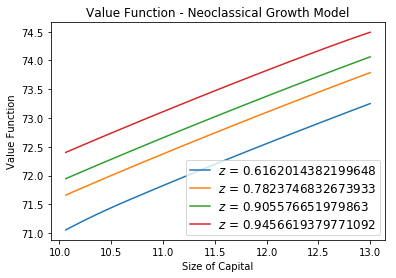

In [12]:
# Plot value function
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[1:], VF[1:, 0], label='$z$ = ' + str(z_grid[0]))
ax.plot(k_grid[1:], VF[1:, 15], label='$z$ = ' + str(z_grid[5]))
ax.plot(k_grid[1:], VF[1:, 30], label='$z$ = ' + str(z_grid[15]))
ax.plot(k_grid[1:], VF[1:, 45], label='$z$ = ' + str(z_grid[19]))
# Now add the legend with some customizations.
legend = ax.legend(loc='lower right', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Size of Capital')
plt.ylabel('Value Function')
plt.title('Value Function - Neoclassical Growth Model')
plt.show()

### Plot optimal consumption rule

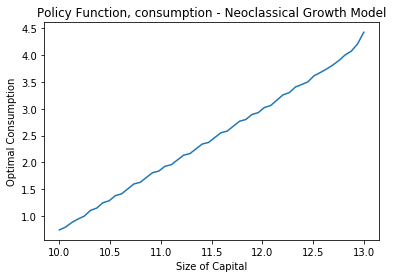

In [13]:
# Plot optimal consumption rule as a function of capital
optK = k_grid[PF]
optC = z_grid * k_grid ** (alpha) + (1 - delta) * k_grid - optK
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[:], optC[:][18], label='Consumption')
# Now add the legend with some customizations.
#legend = ax.legend(loc='upper left', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Size of Capital')
plt.ylabel('Optimal Consumption')
plt.title('Policy Function, consumption - Neoclassical Growth Model')
plt.show()


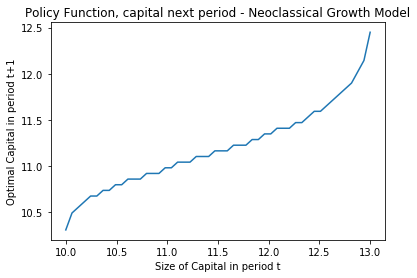

In [14]:
# Plot optimal consumption rule as a function of capital size
optK = k_grid[PF]
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[:], optK[:][18], label='Capital in period t+1')
# Now add the legend with some customizations.
#legend = ax.legend(loc='upper left', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Size of Capital in period t')
plt.ylabel('Optimal Capital in period t+1')
plt.title('Policy Function, capital next period - Neoclassical Growth Model')
plt.show()

## Question 3

### 1. Bellman equation

$V(z, k) = \max_c\left\{
U(c) + \beta\mathbb E\left[V(z', k)\ |\ z\right]
\right\}$


### Set Parameters

Parameters:
* $\gamma$ : Coefficient of Relative Risk Aversion
* $\beta$ : Discount factor
* $\delta$ : Rate of depreciation
* $\alpha$ : Curvature of production function
* $\mu_z$ : Mean of productivity shock
* $\rho_z$ : AR1 coefficient of productivity shock
* $\sigma_v$ : Standard deviation of v


In [15]:
# Parameters

gamma = 0.5
beta = 0.96
delta = 0.05
alpha = 0.4
mu = 0
rho = 0.8
sigma_v = 0.1

In [16]:
'''
------------------------------------------------------------------------
Create Grid for State Space - Capital and Shock
------------------------------------------------------------------------
lb_k      = scalar, lower bound of capital grid
ub_k      = scalar, upper bound of capital grid
size_k    = integer, number of grid points in capital state space
k_grid    = vector, size_k x 1 vector of capital grid points 
------------------------------------------------------------------------
'''
lb_k = 10
ub_k = 13
size_k = 50  # Number of grid points of k
size_z = 50 # Number of grid points of z
k_grid = np.linspace(lb_k, ub_k, size_k)

import ar1_approx as ar1
ln_z_grid, pi = ar1.addacooper(size_z, mu, rho, sigma_v)
z_grid = np.exp(ln_z_grid)
pi_z = np.transpose(pi)


In [17]:
'''
------------------------------------------------------------------------
Create grid of current utility values    
------------------------------------------------------------------------
C        = matrix, current consumption (c=z_tk_t^a - k_t+1 + (1-delta)k_t)
U        = matrix, current period utility value for all possible
           choices of k and k'
------------------------------------------------------------------------
'''

C = np.zeros((size_k, size_k, size_z))
for i in range(size_k): # loop over k_t
    for j in range(size_k): # loop over k_t+1
        for q in range(size_z): #loop over z_t
            C[i, j, q] = z_grid[q]* k_grid[i]**alpha + (1 - delta)*k_grid[i] - k_grid[j]
# replace 0 and negative consumption with a tiny value 
# This is a way to impose non-negativity on cons
C[C<=0] = 1e-15
if gamma == 1:
    U = np.log(C)
else:
    U = (C ** (1 - gamma)) / (1 - gamma)
U[C<0] = -9999999

In [18]:
'''
------------------------------------------------------------------------
Value Function Iteration    
------------------------------------------------------------------------
VFtol     = scalar, tolerance required for value function to converge
VFdist    = scalar, distance between last two value functions
VFmaxiter = integer, maximum number of iterations for value function
V         = vector, the value functions at each iteration
Vmat      = matrix, the value for each possible combination of w and w'
Vstore    = matrix, stores V at each iteration 
VFiter    = integer, current iteration number
TV        = vector, the value function after applying the Bellman operator
PF        = vector, indicies of choices of w' for all w 
VF        = vector, the "true" value function
------------------------------------------------------------------------
'''
VFtol = 1e-6 
VFdist = 7.0 
VFmaxiter = 500 
V = np.zeros((size_k, size_z)) # initial guess at value function
Vmat = np.zeros((size_k, size_k, size_z)) # initialize Vmat matrix
Vstore = np.zeros((size_k, size_z, VFmaxiter)) #initialize Vstore array
VFiter = 1 
while VFdist > VFtol and VFiter < VFmaxiter:
    for i in range(size_k): # loop over k_t
        for j in range(size_k): # loop over k_t+1
            for q in range(size_z): #loop over z_t
                EV = 0
                for qq in range(size_z):
                    EV += pi_z[q, qq]*V[j, qq]
                Vmat[i, j, q] = U[i, j, q] + beta * EV
      
    Vstore[:,:, VFiter] = V.reshape(size_k, size_z,) # store value function at each iteration for graphing later
    TV = Vmat.max(1) # apply max operator over k_t+1
    PF = np.argmax(Vmat, axis=1)
    VFdist = (np.absolute(V - TV)).max()  # check distance
    V = TV
    VFiter += 1 
    


if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge')            


VF = V # solution to the functional equation

Value function converged after this many iterations: 367


### Extract optimal decision rules

In [19]:
'''
------------------------------------------------------------------------
Find consumption and capital policy functions   
------------------------------------------------------------------------
optK  = vector, the optimal choice of k' for each k
optC  = vector, the optimal choice of c for each k
------------------------------------------------------------------------
'''
optK = k_grid[PF] # tomorrow's optimal cake size (savings function)
optC = z_grid * (k_grid ** alpha) + (1 - delta) * k_grid - optK

### Plot Value Function

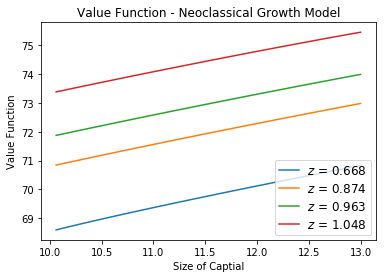

In [20]:
# Plot value function 
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[1:], VF[1:, 0], label='$z$ = ' + str(round(z_grid[0], 3)))
ax.plot(k_grid[1:], VF[1:, 15], label='$z$ = ' + str(round(z_grid[10], 3)))
ax.plot(k_grid[1:], VF[1:, 30], label='$z$ = ' + str(round(z_grid[20], 3)))
ax.plot(k_grid[1:], VF[1:, 45], label='$z$ = ' + str(round(z_grid[30], 3)))
# Now add the legend with some customizations.
legend = ax.legend(loc='lower right', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Size of Captial')
plt.ylabel('Value Function')
plt.title('Value Function - Neoclassical Growth Model')
plt.show()


### Plot optimal consumption rule

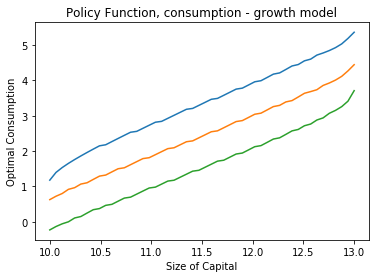

In [22]:
# Plot optimal consumption rule as a function of capital
optK = k_grid[PF]
optC = z_grid * k_grid ** (alpha) + (1 - delta) * k_grid - optK
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[:], optC[:][1], label='Consumption')
ax.plot(k_grid[:], optC[:][18], label='Consumption')
ax.plot(k_grid[:], optC[:][35], label='Consumption')
# Now add the legend with some customizations.
#legend = ax.legend(loc='upper left', shadow=False)
plt.xlabel('Size of Capital')
plt.ylabel('Optimal Consumption')
plt.title('Policy Function, consumption - growth model')
plt.show()

### Plot optimal capital rule

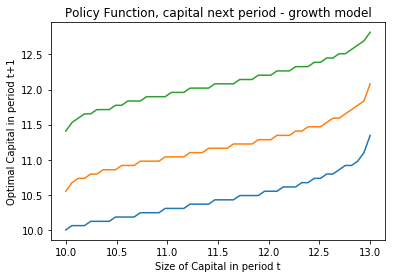

In [24]:
# Plot optimal capital in period t + 1
optK = k_grid[PF]
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[:], optK[:][4], label='Capital in period t+1')
ax.plot(k_grid[:], optK[:][18], label='Capital in period t+1')
ax.plot(k_grid[:], optK[:][35], label='Capital in period t+1')
# Now add the legend with some customizations.
#legend = ax.legend(loc='upper left', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Size of Capital in period t')
plt.ylabel('Optimal Capital in period t+1')
plt.title('Policy Function, capital next period - growth model')
plt.show()

## Question 4

### Bellman equation:
$$V(w_t) = \max\left\{ V^U(w_t), V^J(w_t) \right\}$$

where:
$$V^U(w)=b+\beta\mathbb EV(w')$$

and
$$V^J(w)=\mathbb E_0\sum_{t=0}^\infty\beta^tw=\frac{w}{1-\beta}$$

### Set Parameters

Parameters:
* $\gamma$ : Coefficient of Relative Risk Aversion
* $\beta$ : Discount factor
* $\delta$ : Rate of depreciation
* $\alpha$ : Curvature of production function
* $\sigma_z$ : Standard dev of productivity shocks

In [25]:
# Set Parameters

beta = .96
size_b = 20
b = np.linspace(.05, 1, size_b) 
sigma = .15
mu = 0
rho = 0

In [27]:
size_w = 100
# We can simulate an iid process by using an AR(1) process where rho = 1
# In this way, the ar1_approx.py script will calculate the appropriate
# transition probabilties
ln_wage_grid, pi_t = ar1.addacooper(size_w, mu, rho, sigma)
w_grid = np.exp(ln_wage_grid)
pi = np.transpose(pi_t)

# Utility values of accepting a wage offer
U = w_grid / (1 - beta)

In [28]:
'''
------------------------------------------------------------------------
Value Function Iteration    
------------------------------------------------------------------------
VFtol       = scalar, tolerance required for value function to converge
VFdist      = scalar, distance between last two value functions
VFmaxiter   = integer, maximum number of iterations for value function
V           = matrix, the value functions at each iteration
TV          = matrix, the value function after applying the Bellman operator
PF_discrete = matrix, matrix of policy function: eat=1, not eat=0 
Vstore      = array, stores V at each iteration 
VFiter      = integer, current iteration number
EV          = scalar, expected value function for a given state
U_eat       = matrix, utility from eating cake now
Vwait       = matrix, value of waiting to eat the cake
VF          = vector, the "true" value function
------------------------------------------------------------------------
'''
VFtol = 1e-8 
VFdist = 7.0 
VFmaxiter = 3000 
V = np.zeros((size_w, size_b)) # initial guess at value function
TV = np.zeros((size_w, size_b))
PF_discrete = np.zeros((size_w, size_b))
Vstore = np.zeros((size_w, size_b, VFmaxiter)) #initialize Vstore array
VFiter = 1 
while (VFdist > VFtol and VFiter < VFmaxiter):
    for i in range(size_w): # loop over w
        for j, bVal in enumerate(b):
   
            EV = 0
            for ii in range(size_w):  # loop over w
                EV += pi[i, ii] * V[ii, j]  
            
            U_accept = U[i]
                
            V_wait = bVal + beta * EV 
            TV[i, j] = max(U_accept, V_wait)
            PF_discrete[i, j] = U_accept >= V_wait  
            
    Vstore[:,:, VFiter] = TV # store value function at each iteration for graphing later 
    VFdist = (np.absolute(V - TV)).max()  # check distance
    V = TV
    VFiter += 1 

if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge')            


VF = V # solution to the functional equation


Value function converged after this many iterations: 3


### Compute reservation wage

In [29]:
'''
------------------------------------------------------------------------
Find reservation wage  
------------------------------------------------------------------------
'''
reservation_wage = w_grid[np.argmax(PF_discrete, axis=0)]

### Plot value function

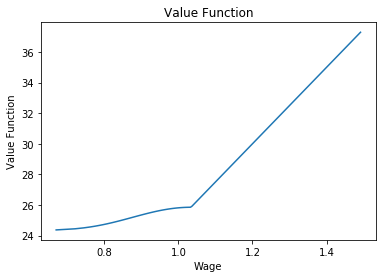

In [30]:
# Plot value function 
plt.figure()
fig, ax = plt.subplots()
ax.plot(w_grid[:], VF[:,1])

for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Wage')
plt.ylabel('Value Function')
plt.title('Value Function')
plt.show()

### Plot reservation wage and unemployment benefits

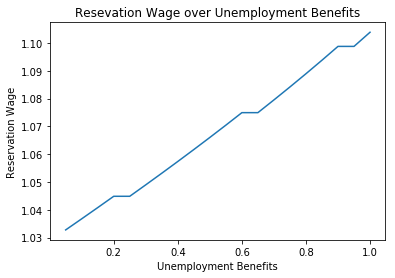

In [31]:
# Plot reservation wage and unemployement benefits
plt.figure()
fig, ax = plt.subplots()
ax.plot(b[:], reservation_wage[:])
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Unemployment Benefits')
plt.ylabel('Reservation Wage')
plt.title('Resevation Wage over Unemployment Benefits')
plt.show()